In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from scipy.stats import skew
from sklearn.compose import ColumnTransformer as column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
df=pd.read_csv(r"C:\Users\humag\OneDrive\Documents\PYTHON\dataset\fraud_detect\AIML Dataset.csv")
print(df.head().T)

                          0            1            2           3            4
step                      1            1            1           1            1
type                PAYMENT      PAYMENT     TRANSFER    CASH_OUT      PAYMENT
amount              9839.64      1864.28        181.0       181.0     11668.14
nameOrig        C1231006815  C1666544295  C1305486145  C840083671  C2048537720
oldbalanceOrg      170136.0      21249.0        181.0       181.0      41554.0
newbalanceOrig    160296.36     19384.72          0.0         0.0     29885.86
nameDest        M1979787155  M2044282225   C553264065   C38997010  M1230701703
oldbalanceDest          0.0          0.0          0.0     21182.0          0.0
newbalanceDest          0.0          0.0          0.0         0.0          0.0
isFraud                   0            0            1           1            0
isFlaggedFraud            0            0            0           0            0


In [3]:
df.isnull().sum().sum()
df.duplicated().sum()
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df['type'].value_counts()
df['nameOrig'].nunique()
# df['nameDest'].nunique()

6353307

In [6]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

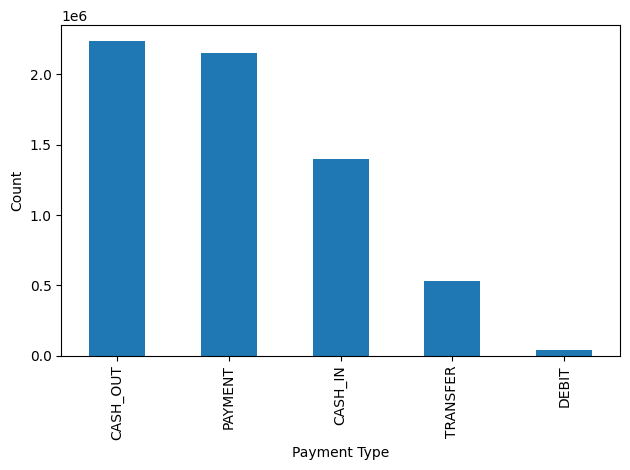

In [8]:
ax = df['type'].value_counts().plot(kind='bar')
ax.set_xlabel("Payment Type")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

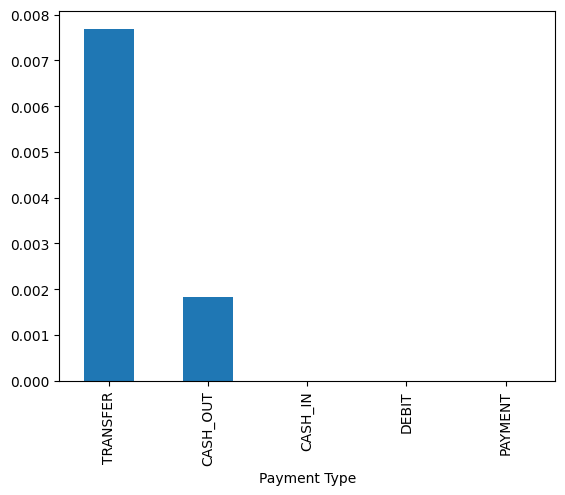

In [47]:
fraud_grp=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_grp.plot(kind='bar')
plt.xlabel('Payment Type')
plt.show()

In [10]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

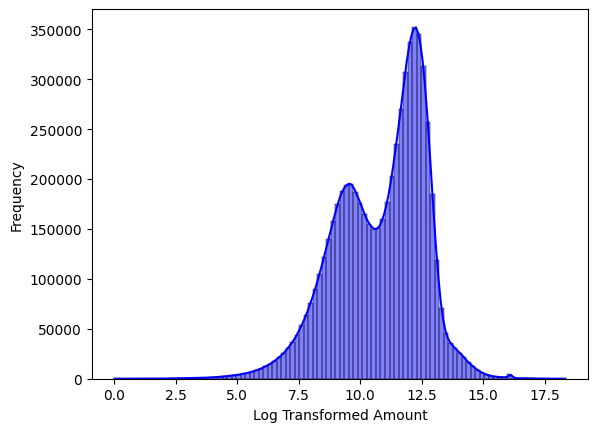

In [11]:
sns.histplot(np.log1p(df['amount']), bins=100, color='blue' , kde=True)
plt.xlabel('Log Transformed Amount')
plt.ylabel('Frequency')
plt.show()


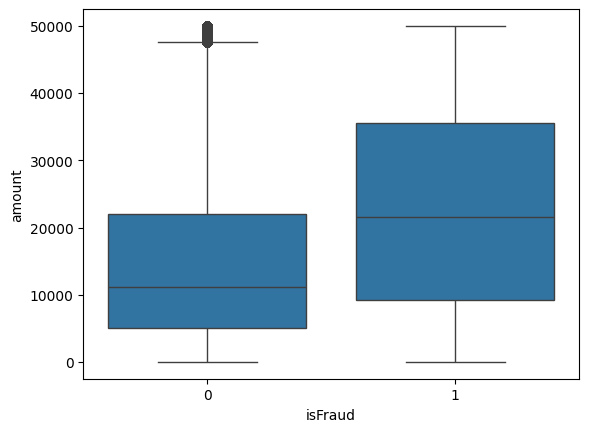

In [12]:
sns.boxplot(x='isFraud', y='amount', data=df[df['amount']<50000])
plt.show()

In [13]:
src_amt_diff=df['oldbalanceOrg']-df['newbalanceOrig']
dest_amt_diff=df['newbalanceDest']-df['oldbalanceDest']


In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

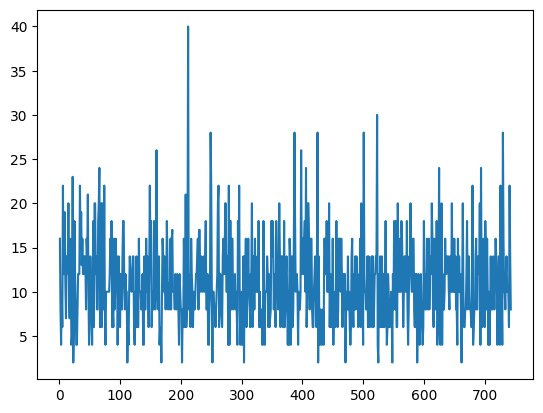

In [15]:
fraud_per_step=df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values , label='fraud per steps')
plt.show()

In [16]:
df.shape

(6362620, 11)

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [19]:
df.drop(columns='step' , inplace=True)

In [20]:
df.shape

(6362620, 10)

In [21]:
df[df['isFraud']==1]['nameOrig'].value_counts().head()

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
Name: count, dtype: int64

In [22]:
fraud_users=df[df['isFraud']==1]['nameDest'].value_counts


In [23]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1049862186      1
C2118381511      1
C2099952089      1
C1027984317      1
C1251365829      1
Name: count, Length: 2722362, dtype: int64

In [24]:
fraud_users

<bound method IndexOpsMixin.value_counts of 2           C553264065
3            C38997010
251         C972765878
252        C1007251739
680        C1848415041
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 8213, dtype: object>

In [25]:
fraud_types=df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [26]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

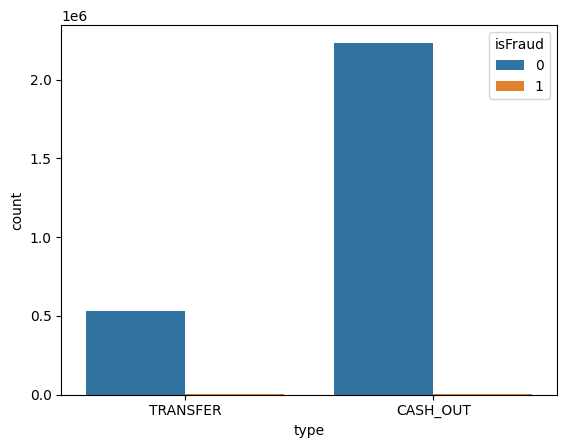

In [27]:
sns.countplot(x='type', hue='isFraud', data=fraud_types)
plt.show()

In [28]:
corre =df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()
corre

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


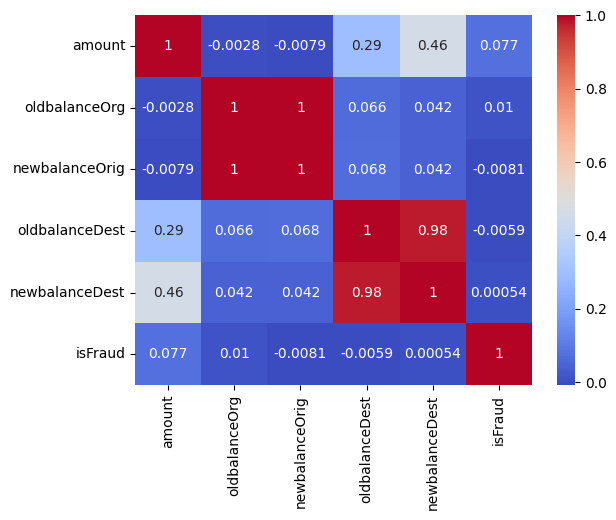

In [29]:
sns.heatmap(corre, annot=True, cmap='coolwarm')
plt.show()

In [30]:
categorical_cols=['type']
numeric_cols=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [31]:
y=df['isFraud']
x=df.drop(columns='isFraud', axis=1)

In [32]:
x.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
# avoid reusing the name `categorical_cols` which was previously a list of column names
# define the categorical column names explicitly and create a new dataframe for the encoded result
cat_cols = ['type']

# fit transformer and create a dataframe with proper column names
# use `sparse_output=False` for newer scikit-learn versions (replaces the deprecated `sparse` argument)
oe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oe.fit(X_train[cat_cols])
cat_df = pd.DataFrame(oe.transform(X_train[cat_cols]), columns=oe.get_feature_names_out(cat_cols))

cat_df

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4453829,0.0,0.0,0.0,0.0,1.0
4453830,0.0,1.0,0.0,0.0,0.0
4453831,0.0,0.0,0.0,1.0,0.0
4453832,0.0,0.0,0.0,1.0,0.0


In [35]:
preprocessor = column_transformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop'
)

In [36]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced' ,max_iter=1000))
])

In [37]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


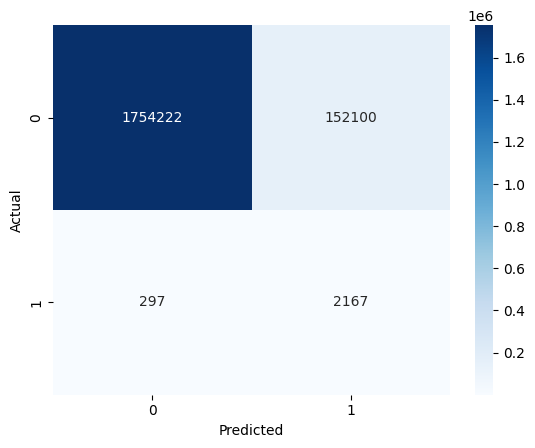

In [39]:
confusion_matrix = pd.crosstab(y_test, pipeline.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [42]:
classification_report = classification_report(y_test, pipeline.predict(X_test))
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1906322
           1       0.01      0.88      0.03      2464

    accuracy                           0.92   1908786
   macro avg       0.51      0.90      0.49   1908786
weighted avg       1.00      0.92      0.96   1908786



In [38]:
pipeline.score(X_test, y_test)

0.9201602484511098

In [43]:
pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1], shape=(1908786,))

In [46]:
import joblib
joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']